In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs
%matplotlib inline

In [2]:
def load_data(file_path):
    # Data is mainly composed of 2 exam grades and decision which is either 0 or 1.
    data = np.loadtxt(fname=file_path, delimiter=',')

    # Adding Intercept term for x data
    X = np.array([np.append(1, row) for row in data[:, :-1]])
    Y = np.array(data[:, -1])

    return X, Y


def display_data(data, labels):
    # plotting exam1 vs exam2 grade
    positive_indexes = np.where(labels == 1)
    negative_indexes = np.where(labels == 0)

    plt.plot(data[negative_indexes, 1], data[negative_indexes, 2], 'ro')
    plt.plot(data[positive_indexes, 1], data[positive_indexes, 2], 'g+')

    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')

    plt.show()


def standardize_data(data):
    mean = np.mean(data, axis=0)
    std_deviation = np.std(data, axis=0)

    std_data = data.copy()
    for row in std_data:
        for i in range(len(row)):
            if i != 0:
                row[i] = (row[i] - mean[i]) / std_deviation[i]

    return std_data


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_cost(parameters, data, labels):
    m = len(labels)
    h_x = sigmoid(np.dot(data, parameters))
    J = np.sum(-labels * np.log(h_x) - (1 - labels) * np.log(1 - h_x)) / m
    return J


def gradient(parameters, data, labels):
    m = len(labels)
    h_x = sigmoid(np.dot(data, parameters))
    grads = (1 / m) * (h_x - labels).dot(data)
    return grads


def save_weights(weights):
    with open(file='./weights.csv', mode='w') as f:
        string_weight = ""
        for i, theta in enumerate(weights):
            if i != 2:
                seperator = ','
            else:
                seperator = '\n'

            string_weight += str(theta) + seperator
        f.writelines(string_weight)


def visualize_boundary(data, labels, weights):
    positive_indexes = np.where(labels == 1)
    negative_indexes = np.where(labels == 0)

    num_pts = 10
    x_pts, y_pts = np.ogrid[min(data[:, 1]):max(data[:, 1]):num_pts * 1j, min(data[:, 2]):max(data[:, 2]):num_pts * 1j]

    plt.plot(data[negative_indexes, 1], data[negative_indexes, 2], 'ro')
    plt.plot(data[positive_indexes, 1], data[positive_indexes, 2], 'g+')
    plt.contour(x_pts.ravel(), y_pts.ravel(), weights[0] + weights[1] * x_pts + weights[2] * y_pts - 0.5, levels=[0])

    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')

    plt.show()


def decision(x):
    if x >= 0.5:
        return 1
    else:
        return 0


def accuracy(data, labels, weights):
    count = 0
    predictions = [decision(sigmoid(np.dot(grade, weights))) for grade in data]
    for i, pred in enumerate(predictions):
        if pred == labels[i]:
            count += 1

    return (count / len(labels)) * 100.0

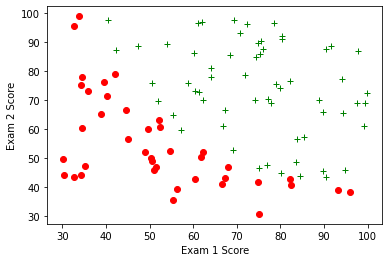

Cost at initial theta (zeros): 0.6931471805599453
Expected Cost (approx): 0.693
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]
Expected Gradients (approx): [-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.21833019382659774
Expected Cost (approx): 0.218
Gradient at non-zero theta: [0.04290299 2.56623412 2.64679737]
Expected Gradients (approx): [0.043, 2.566, 2.647]
Optimized Parameters are: [-25.16133284   0.2062317    0.2014716 ]


C:\Users\Vijay\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
C:\Users\Vijay\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in multiply


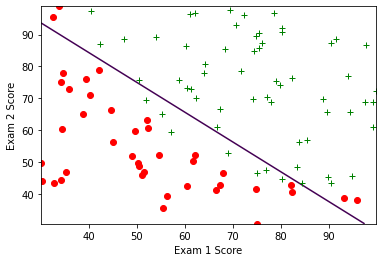

For Student with scores 45 and 85, we predict probability of: 0.7762907240588942,   Expected: 0.775 +/- 0.002

Logistic Regression Model Accuracy: 89.0


In [3]:
def main():
    x, y = load_data(file_path='./ex2data1.txt')
    display_data(data=x, labels=y)
    x_std = standardize_data(data=x.copy())

    init_theta = np.zeros(shape=x[0, :].shape, dtype=np.float32)

    # Computing and displaying initial cost and gradient
    cost = compute_cost(data=x, labels=y, parameters=init_theta)
    grads = gradient(data=x, labels=y, parameters=init_theta)
    print(f"Cost at initial theta (zeros): {cost}")
    print(f"Expected Cost (approx): 0.693")
    print(f"Gradient at initial theta (zeros): {grads}")
    print(f"Expected Gradients (approx): [-0.1000, -12.0092, -11.2628]")

    # Computing Cost and gradients with non-zero thetas
    test_theta = np.array([-24, 0.2, 0.2])
    cost = compute_cost(data=x, labels=y, parameters=test_theta)
    grads = gradient(data=x, labels=y, parameters=test_theta)
    print(f"\nCost at test theta: {cost}")
    print(f"Expected Cost (approx): 0.218")
    print(f"Gradient at non-zero theta: {grads}")
    print(f"Expected Gradients (approx): [0.043, 2.566, 2.647]")

    # Optimizing Thetas
    theta, theta_i = fmin_bfgs(compute_cost, init_theta, fprime=gradient, args=(x, y), retall=1, disp=0)

    J = np.zeros(len(theta_i))
    for i, th in enumerate(theta_i):
        J[i] = compute_cost(parameters=th, data=x, labels=y)

    print('Optimized Parameters are: {}'.format(theta))
    save_weights(theta)

    visualize_boundary(x, y, theta)

    test = sigmoid(np.dot([1, 45, 85], theta))
    print("For Student with scores 45 and 85, we predict probability of: {},   Expected: 0.775 +/- 0.002\n".format(test))

    print("Logistic Regression Model Accuracy: {}".format(accuracy(data=x, labels=y, weights=theta)))


if __name__ == '__main__':
    main()
